In [59]:
pip install scrapy

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pwd

/home/ec2-user/SageMaker


In [2]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
!scrapy startproject gamesoflegends

New Scrapy project 'gamesoflegends', using template directory '/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/scrapy/templates/project', created in:
    /home/ec2-user/SageMaker/gamesoflegends

You can start your first spider with:
    cd gamesoflegends
    scrapy genspider example example.com


In [142]:
!ls

ELO_players.ipynb  esports-data    leagues.csv	new_leagues.csv
ELO_teams.ipynb    gamesoflegends  lost+found	Untitled.ipynb


In [9]:
os.chdir('..')

In [ ]:
!scrapy crawl srs -O series.json

In [3]:
def json_to_df(path):
    with open(path, 'r') as j:
        contents = json.loads(j.read())

    df = pd.json_normalize(contents)
    return df

In [4]:
games = json_to_df('gamesoflegends/games.json')

In [4]:
series = json_to_df('gamesoflegends/series.json')

In [6]:
games.sort_values(by =['date'], inplace =True)

In [156]:
games

,date,tournament_name,blue_side_team,blue_side_result,red_side_team,red_side_result,players_blue,players_red
140,2013-09-16,Season 3 World Championship,GamingGear,LOSS,Team SoloMid,WIN,"[Nbs, Alunir, Mazzerin, DeadlyBrother, Inspirro]","[Dyrus, TheOddOne, Reginald, WildTurtle, Xpecial]"
149,2013-09-16,Season 3 World Championship,Gambit Gaming,WIN,Samsung Ozone,LOSS,"[Darien, Diamondprox, Alex Ich, Genja, Voidle]","[Looper, DanDy, dade, imp, Mata]"
148,2013-09-16,Season 3 World Championship,Mineski,LOSS,Fnatic,WIN,"[Snoy, Kaigu, Yume, Exo, Tgee]","[sOAZ, Cyanide, xPeke, puszu, YellOwStaR]"
147,2013-09-16,Season 3 World Championship,Samsung Ozone,WIN,Team Vulcun,LOSS,"[Looper, DanDy, dade, imp, Mata]","[Sycho Sid, Xmithie, mancloud, Zuna, BloodWater]"
146,2013-09-16,Season 3 World Championship,Gambit Gaming,WIN,Mineski,LOSS,"[Darien, Diamondprox, Alex Ich, Genja, Voidle]","[Snoy, Kaigu, Yume, Exo, Tgee]"
...,...,...,...,...,...,...,...,...
46475,2023-09-09,VCS Summer Playoffs 2023,Team Whales,WIN,GAM Esports,LOSS,"[Sparda, BeanJ, Gloryy, Artemis, CBL]","[Kiaya, Levi, Kati, Slayder, Palette]"
46486,2023-09-10,LEC Season Finals 2023,G2 Esports,LOSS,Fnatic,WIN,"[Brokenblade, Yike, Caps, Hans sama, Mikyx]","[Wunder, Razork, Humanoid, Noah, Trymbi]"
46484,2023-09-10,LEC Season Finals 2023,G2 Esports,WIN,Fnatic,LOSS,"[Brokenblade, Yike, Caps, Hans sama, Mikyx]","[Wunder, Razork, Humanoid, Noah, Trymbi]"
46485,2023-09-10,LEC Season Finals 2023,Fnatic,LOSS,G2 Esports,WIN,"[Wunder, Razork, Humanoid, Noah, Trymbi]","[Brokenblade, Yike, Caps, Hans sama, Mikyx]"


In [6]:
df = series.rename_axis('index').sort_values(by = ['date', 'index'], ascending = [True, True])

In [5]:
tournaments = json_to_df('esports-data/tournaments.json')
tournaments2 = json_to_df('esports-data/tournaments_without_game_data.json')
players = json_to_df('esports-data/unfiltered_players.json')
#unfiltered_players = json_to_df('esports-data/unfiltered_players.json')
leagues = json_to_df('esports-data/leagues.json')
teams = json_to_df('esports-data/unfiltered_teams.json')
mapping_data = json_to_df('esports-data/mapping_data.json')
new_leagues = pd.read_csv('new_leagues.csv')
new_leagues = new_leagues.drop('Unnamed: 0', axis = 1)
tournaments = pd.concat([tournaments, tournaments2], ignore_index=True)
tournaments.sort_values(by =['startDate'], inplace =True)
players = players.drop_duplicates(subset=['player_id'])

In [7]:
slug = df['tournament_name'].str.split(' ')

In [8]:
slug = slug.to_frame()

In [9]:
slug['slug'] = 'NaN'

In [10]:
slug

,tournament_name,slug
index,,
140,"[Season, 3, World, Championship]",NaN
141,"[Season, 3, World, Championship]",NaN
142,"[Season, 3, World, Championship]",NaN
143,"[Season, 3, World, Championship]",NaN
144,"[Season, 3, World, Championship]",NaN
...,...,...
46491,"[LEC, Season, Finals, 2023]",NaN
46492,"[LEC, Season, Finals, 2023]",NaN
46493,"[LEC, Season, Finals, 2023]",NaN


In [11]:
for index, game in slug.iterrows():
    for word in game['tournament_name']:
        if word.lower() in new_leagues.values:
            slug.at[index,'slug'] = word.lower()
            break

In [12]:
slug.drop(slug[slug['slug'] == 'NaN'].index)

,tournament_name,slug
index,,
140,"[Season, 3, World, Championship]",world
141,"[Season, 3, World, Championship]",world
142,"[Season, 3, World, Championship]",world
143,"[Season, 3, World, Championship]",world
144,"[Season, 3, World, Championship]",world
...,...,...
46491,"[LEC, Season, Finals, 2023]",lec
46492,"[LEC, Season, Finals, 2023]",lec
46493,"[LEC, Season, Finals, 2023]",lec


In [13]:
df.insert(1, 'league', slug['slug'])

In [14]:
df = df.drop(df[df['league'] == 'NaN'].index)

In [15]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [16]:
df

,date,league,tournament_name,blue_side_team,red_side_team,blue_side_wins,n_games,players_blue,players_red,year,month
index,,,,,,,,,,,
140,2013-09-16,world,Season 3 World Championship,GamingGear,Team SoloMid,0,1,"[Nbs, Alunir, Mazzerin, DeadlyBrother, Inspirro]","[Dyrus, TheOddOne, Reginald, WildTurtle, Xpecial]",2013,9
141,2013-09-16,world,Season 3 World Championship,SK Telecom T1,Lemondogs,1,1,"[Impact, bengi, Faker, Piglet, PoohManDu]","[Zorozero, dexter, Nukeduck, Tabzz, Mithy]",2013,9
142,2013-09-16,world,Season 3 World Championship,Team SoloMid,OMG,0,1,"[Dyrus, TheOddOne, Reginald, WildTurtle, Xpecial]","[Gogoing, LoveLing, Cool, San, bigpomelo]",2013,9
143,2013-09-16,world,Season 3 World Championship,Lemondogs,GamingGear,1,1,"[Zorozero, dexter, Nukeduck, Tabzz, Mithy]","[Nbs, Alunir, Mazzerin, DeadlyBrother, Inspirro]",2013,9
144,2013-09-16,world,Season 3 World Championship,OMG,SK Telecom T1,1,1,"[Gogoing, LoveLing, Cool, San, bigpomelo]","[Impact, bengi, Faker, Piglet, PoohManDu]",2013,9
...,...,...,...,...,...,...,...,...,...,...,...
46491,2023-09-09,lec,LEC Season Finals 2023,Fnatic,MAD Lions,3,5,"[Wunder, Razork, Humanoid, Noah, Trymbi]","[Chasy, Elyoya, Nisqy, Carzzy, Hylissang]",2023,9
46492,2023-09-10,lec,LEC Season Finals 2023,G2 Esports,Fnatic,3,4,"[Brokenblade, Yike, Caps, Hans sama, Mikyx]","[Wunder, Razork, Humanoid, Noah, Trymbi]",2023,9
46493,2023-09-10,lec,LEC Season Finals 2023,Fnatic,G2 Esports,1,4,"[Wunder, Razork, Humanoid, Noah, Trymbi]","[Brokenblade, Yike, Caps, Hans sama, Mikyx]",2023,9


In [17]:
ELO_players = pd.DataFrame(columns = ['handle', 'ELO'])
ELO_teams = pd.DataFrame(columns = ['name', 'ELO'])

In [18]:
def start_elo(player, league_slug, ELO_players, new_leagues):
    ELO = new_leagues.loc[new_leagues['slug'] == league_slug]['ELO'].item()
    elop = pd.DataFrame({'handle' : [player], 'ELO': [ELO]})
    ELO_players = pd.concat([ELO_players, elop], ignore_index = True)
    return ELO_players

In [19]:
def get_elo(league_slug, players_blue, players_red, ELO_players, new_leagues):
    elo_blue_side = 0
    elo_red_side = 0
    
    for player in players_blue :
        if player not in ELO_players.values :
            ELO_players = start_elo(player, league_slug, ELO_players, new_leagues)
        elo_blue_side += ELO_players.loc[ELO_players['handle'] == player]['ELO'].item()
    
    for player in players_red :
        if player not in ELO_players.values :
            ELO_players = start_elo(player, league_slug, ELO_players, new_leagues)
        elo_red_side += ELO_players.loc[ELO_players['handle'] == player]['ELO'].item()
        
    return elo_blue_side // len(players_blue), elo_red_side // len(players_red), ELO_players

In [20]:
def elo_calc(r_a, r_b, k, result):
    e_a = 1 / (1 + pow(10, ((r_b - r_a)/400)))
    e_b = 1 / (1 + pow(10, ((r_a - r_b)/400)))
    
    if result == 'WIN':
        r = 1
    else:
        r = 0
    
    change_a = int(k * (r - e_a))
    change_b = int(k * (1 - r - e_b))
    
    return change_a, change_b

In [21]:
def elo_change(elo_change_blue, elo_change_red, ELO_players, players_blue, players_red):
    for player in players_blue:
        elo = ELO_players.loc[ELO_players['handle'] == player]['ELO'].item()
        new_elo = elo + elo_change_blue
        ELO_players.loc[ELO_players['handle'] == player, 'ELO'] = new_elo
    for player in players_red:
        elo = ELO_players.loc[ELO_players['handle'] == player]['ELO'].item()
        new_elo = elo + elo_change_red
        ELO_players.loc[ELO_players['handle'] == player, 'ELO'] = new_elo
    return ELO_players

In [22]:
def change_ELO_teams(elo, team, ELO_teams):
    
    if team not in ELO_teams.values:
        elot = pd.DataFrame({'name': [team], 'ELO':[elo]})
        ELO_teams = pd.concat([ELO_teams, elot], ignore_index=True)
        return ELO_teams
    
    ELO_teams.loc[ELO_teams['name'] == team, 'ELO'] = elo
    return ELO_teams

In [112]:
%%time

for index, game in df.iterrows():
    
    elo_blue_side, elo_red_side, ELO_players= get_elo(game['league'], game['players_blue'], game['players_red'], ELO_players, new_leagues)
    
    k = 50
    result_blue_side = game['blue_side_result']
    elo_change_blue, elo_change_red = elo_calc(elo_blue_side, elo_red_side, k, result_blue_side)
    
    ELO_teams = change_ELO_teams(elo_blue_side + elo_change_blue, game['blue_side_team'], ELO_teams)
    ELO_teams = change_ELO_teams(elo_red_side + elo_change_red, game['red_side_team'], ELO_teams)
    ELO_players = elo_change(elo_change_blue, elo_change_red, ELO_players, game['players_blue'], game['players_red'])
    
    if (game['month'] == 1 or game['month'] == 6) and  f"{game['year']}-{game['month']}" not in ELO_players.columns:
        ELO_players[f"{game['year']}-{game['month']}"] = ELO_players['ELO']
        ELO_teams[f"{game['year']}-{game['month']}"] = ELO_teams['ELO']
        print(f"Reached {game['year']}-{game['month']}")

Reached 2014-1
Reached 2014-6
Reached 2015-1
Reached 2015-6
Reached 2016-1
Reached 2016-6
Reached 2017-1
Reached 2017-6
Reached 2018-1
Reached 2018-6
Reached 2019-1
Reached 2019-6
Reached 2020-1
Reached 2020-6
Reached 2021-1
Reached 2021-6
Reached 2022-1
Reached 2022-6
Reached 2023-1
Reached 2023-6
CPU times: user 23min 19s, sys: 567 ms, total: 23min 20s
Wall time: 28min 9s


In [40]:
ELO_players.sort_values(by =['ELO'], ascending = False, inplace =True)

In [41]:
ELO_players

,handle,ELO,2014-1,2014-6,2015-1,2015-6,2016-1,2016-6,2017-1,2017-6,...,2019-1,2019-6,2020-1,2020-6,2021-1,2021-6,2022-1,2022-6,2023-1,2023-6
12,Faker,2048,1669,1669,1669,1696,1791,1790,1810,1835,...,1787,1833,1860,1903,1884,1895,1927,2016,2023,2047
559,Ruler,1927,NaN,NaN,NaN,NaN,NaN,1522,1609,1701,...,1688,1631,1642,1706,1772,1786,1758,1788,1882,1912
1182,Chovy,1907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1586,1635,1673,1706,1721,1733,1698,1718,1802,1847
299,xiaohu,1878,NaN,NaN,NaN,1487,1474,1545,1522,1563,...,1670,1656,1673,1661,1678,1785,1794,1836,1840,1847
936,Yagao,1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1561,1566,1557,1631,1664,1691,1635,1686,1761,1837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,Fallen,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,962,977,977,977,977,928,889,891
1982,Diagu,834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,959,978,992,947,877,888,869
1740,Crocomux,827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,956,879,827,827,827,827,827,827
1745,Counter,806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,962,978,978,957,957,818,806,806


In [102]:
ELO_teams.sort_values(by =['ELO'], ascending = False, inplace =True)

In [86]:
pd.set_option('display.max_rows', None)

In [39]:
pd.reset_option("all")

In [59]:
test = ELO_teams.copy()

In [1]:
test

NameError: name 'test' is not defined

In [48]:
test = ELO_players.copy()

In [49]:
test = test.set_index('handle')

In [60]:
test = test.set_index('name')

In [61]:
column = test.pop("ELO")

In [62]:
test.insert(20, "2023-9", column)

In [63]:
test = test.transpose()

In [67]:
def plot(df, names):
    plt.figure(figsize=(10, 6))
    for name in names:
        df[name].plot()
    plt.xlabel('', fontsize=20)
    plt.ylabel('ELO', fontsize=12)
    plt.legend()
    plt.show()

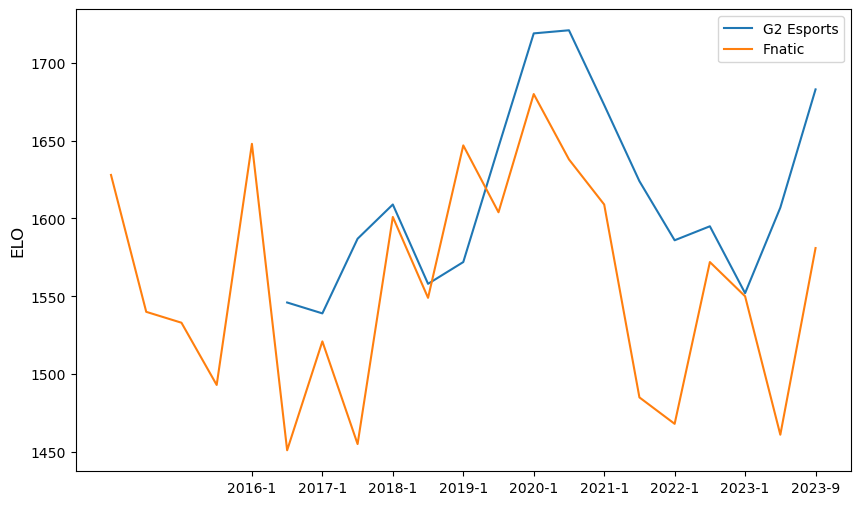

In [69]:
plot(test, ['G2 Esports','Fnatic'])

In [37]:
llist = df[["blue_side_team","red_side_team"]].values.tolist()

In [38]:
df['teams'] = [sorted(l) for l in llist]

In [39]:
col = ['teams']
df = df.loc[((df[col].shift() != df[col])).any(axis=1)]

In [35]:
df = df.drop(df[df['n_games'] == 0].index)

In [68]:
df.loc[df['red_side_team'] == 'DWG KIA' , 'red_side_team'] = 'Dplus KIA'
df.loc[df['blue_side_team'] == 'DWG KIA' , 'blue_side_team'] = 'Dplus KIA'
df.loc[df['red_side_team'] == 'DAMWON Gaming' , 'red_side_team'] = 'Dplus KIA'
df.loc[df['blue_side_team'] == 'DAMWON Gaming' , 'blue_side_team'] = 'Dplus KIA'

In [70]:
df.loc[df['red_side_team'] == 'SK Telecom T1' , 'red_side_team'] = 'T1'
df.loc[df['blue_side_team'] == 'SK Telecom T1' , 'blue_side_team'] = 'T1'
df.loc[df['red_side_team'] == 'SKTelecom T1' , 'red_side_team'] = 'T1'
df.loc[df['blue_side_team'] == 'SKTelecom T1' , 'blue_side_team'] = 'T1'

In [40]:
df

,date,league,tournament_name,blue_side_team,red_side_team,blue_side_wins,n_games,players_blue,players_red,year,month,teams
index,,,,,,,,,,,,
140,2013-09-16,world,Season 3 World Championship,GamingGear,Team SoloMid,0,1,"[Nbs, Alunir, Mazzerin, DeadlyBrother, Inspirro]","[Dyrus, TheOddOne, Reginald, WildTurtle, Xpecial]",2013,9,"[GamingGear, Team SoloMid]"
141,2013-09-16,world,Season 3 World Championship,SK Telecom T1,Lemondogs,1,1,"[Impact, bengi, Faker, Piglet, PoohManDu]","[Zorozero, dexter, Nukeduck, Tabzz, Mithy]",2013,9,"[Lemondogs, SK Telecom T1]"
142,2013-09-16,world,Season 3 World Championship,Team SoloMid,OMG,0,1,"[Dyrus, TheOddOne, Reginald, WildTurtle, Xpecial]","[Gogoing, LoveLing, Cool, San, bigpomelo]",2013,9,"[OMG, Team SoloMid]"
143,2013-09-16,world,Season 3 World Championship,Lemondogs,GamingGear,1,1,"[Zorozero, dexter, Nukeduck, Tabzz, Mithy]","[Nbs, Alunir, Mazzerin, DeadlyBrother, Inspirro]",2013,9,"[GamingGear, Lemondogs]"
144,2013-09-16,world,Season 3 World Championship,OMG,SK Telecom T1,1,1,"[Gogoing, LoveLing, Cool, San, bigpomelo]","[Impact, bengi, Faker, Piglet, PoohManDu]",2013,9,"[OMG, SK Telecom T1]"
...,...,...,...,...,...,...,...,...,...,...,...,...
46434,2023-09-09,pcs,PCS Summer Playoffs 2023,PSG Talon,CTBC Flying Oyster,3,5,"[Azhi, JunJia, Maple, Wako, Woody]","[Rest, Gemini, JimieN, Shunn, ShiauC]",2023,9,"[CTBC Flying Oyster, PSG Talon]"
46453,2023-09-09,cblol,CBLOL Split 2 Playoffs 2023,paiN Gaming,LOUD,1,4,"[Wizer, Cariok, dyNquedo, Bvoy, ProDelta]","[Robo, Croc, Tinowns, Route, Ceos]",2023,9,"[LOUD, paiN Gaming]"
46483,2023-09-09,vcs,VCS Summer Playoffs 2023,Team Whales,GAM Esports,1,4,"[Sparda, BeanJ, Gloryy, Artemis, CBL]","[Kiaya, Levi, Kati, Slayder, Palette]",2023,9,"[GAM Esports, Team Whales]"


In [46]:
%%time

for index, game in df.iterrows():
    
    elo_blue_side, elo_red_side, ELO_players= get_elo(game['league'], game['players_blue'], game['players_red'], ELO_players, new_leagues)
    
    n_games = game['n_games']
    result_blue_side = game['blue_side_wins']
    blue_wins = result_blue_side / n_games
    k = 30 + 70 * (n_games > 4)
    elo_change_blue, elo_change_red = elo_calc_series(elo_blue_side, elo_red_side, k, blue_wins)

    ELO_teams = change_ELO_teams(elo_blue_side + elo_change_blue, game['blue_side_team'], ELO_teams)
    ELO_teams = change_ELO_teams(elo_red_side + elo_change_red, game['red_side_team'], ELO_teams)
    ELO_players = elo_change(elo_change_blue, elo_change_red, ELO_players, game['players_blue'], game['players_red'])
    
    if (game['month'] == 1 or game['month'] == 6) and  f"{game['year']}-{game['month']}" not in ELO_players.columns:
        ELO_players[f"{game['year']}-{game['month']}"] = ELO_players['ELO']
        ELO_teams[f"{game['year']}-{game['month']}"] = ELO_teams['ELO']
        print(f"Reached {game['year']}-{game['month']}")

KeyboardInterrupt: 

In [24]:
def elo_calc_series(r_a, r_b, k, r):
    
    e_a = 1 / (1 + pow(10, ((r_b - r_a)/400)))
    e_b = 1 / (1 + pow(10, ((r_a - r_b)/400)))
    
    change_a = int(k * (r - e_a))
    change_b = int(k * (1 - r - e_b))
    
    return change_a, change_b

In [42]:
ELO_players = pd.DataFrame(columns = ['handle', 'ELO'])
ELO_teams = pd.DataFrame(columns = ['name', 'ELO'])

In [34]:
%%time

for index, game in df.iterrows():
    

    elo_blue_side, elo_red_side,ELO_teams = get_elo_series(game['league'], game['blue_side_team'],game['red_side_team'], ELO_teams, new_leagues)
    
    n_games = game['n_games']
    result_blue_side = game['blue_side_wins']
    blue_wins = result_blue_side / n_games
    k = 30 + 70 * (n_games > 4)
    elo_change_blue, elo_change_red = elo_calc_series(elo_blue_side, elo_red_side, k, blue_wins)

    ELO_teams = elo_change_teams(elo_change_blue, elo_change_red, ELO_teams, game['blue_side_team'], game['red_side_team'] )
    
    if (game['month'] == 1 or game['month'] == 6) and  f"{game['year']}-{game['month']}" not in ELO_teams.columns:
        ELO_teams[f"{game['year']}-{game['month']}"] = ELO_teams['ELO']
        print(f"Reached {game['year']}-{game['month']}")

ZeroDivisionError: division by zero

In [27]:
def get_elo_series(league, blue_side_team, red_side_team, ELO_teams, new_leagues):
    
    if blue_side_team not in ELO_teams.values:
        ELO_teams = start_elo_teams(blue_side_team, league, ELO_teams, new_leagues)
    elo_blue_side = ELO_teams.loc[ELO_teams['name'] == blue_side_team]['ELO'].item()
    if red_side_team not in ELO_teams.values:
        ELO_teams = start_elo_teams(red_side_team, league, ELO_teams, new_leagues)
    elo_red_side = ELO_teams.loc[ELO_teams['name'] == red_side_team]['ELO'].item()    
        
    return elo_blue_side, elo_red_side, ELO_teams

In [28]:
def start_elo_teams(team_name, league, ELO_teams, new_leagues):
    ELO = new_leagues.loc[new_leagues['slug'] == league]['ELO'].item()
    elot = pd.DataFrame({'name': [team_name], 'ELO':[ELO]})
    ELO_teams = pd.concat([ELO_teams, elot], ignore_index=True)
    return ELO_teams

In [33]:
def elo_change_teams(elo_change_blue, elo_change_red, ELO_teams, team_blue_side, team_red_side):
    elo = ELO_teams.loc[ELO_teams['name'] == team_blue_side]['ELO'].item()
    new_elo = elo + elo_change_blue
    ELO_teams.loc[ELO_teams['name'] == team_blue_side, 'ELO'] = new_elo
    
    elo = ELO_teams.loc[ELO_teams['name'] == team_red_side]['ELO'].item()
    new_elo = elo + elo_change_red
    ELO_teams.loc[ELO_teams['name'] == team_red_side, 'ELO'] = new_elo
    return ELO_teams

In [45]:
ELO_players.sort_values(by =['ELO'], ascending = False, inplace =True)

,handle,ELO,2014-1,2014-6,2015-1,2015-6,2016-1,2016-6,2017-1,2017-6,...,2019-1,2019-6,2020-1,2020-6,2021-1,2021-6,2022-1,2022-6,2023-1,2023-6
12,Faker,2138,1699,1699,1699,1737,1860,1846,1872,1895,...,1814,1874,1911,1963,1931,1945,2002,2104,2098,2129
1182,Chovy,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1619,1670,1714,1764,1786,1802,1768,1787,1891,1945
559,Ruler,1986,NaN,NaN,NaN,NaN,NaN,1533,1663,1777,...,1710,1637,1663,1751,1833,1838,1802,1837,1956,1982
936,Yagao,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1593,1605,1586,1685,1711,1739,1649,1724,1824,1940
299,xiaohu,1963,NaN,NaN,NaN,1484,1473,1574,1532,1592,...,1720,1694,1722,1695,1725,1877,1869,1926,1915,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,Rames,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,933,933,871,866
1982,Diagu,786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,941,977,999,937,840,861,834
1740,Crocomux,759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,935,825,759,759,759,759,759,759
1745,Counter,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,948,966,966,935,935,751,746,746


In [47]:
ELO_players.head(25)

,handle,ELO,2014-1,2014-6,2015-1,2015-6,2016-1,2016-6,2017-1,2017-6,...,2019-1,2019-6,2020-1,2020-6,2021-1,2021-6,2022-1,2022-6,2023-1,2023-6
12,Faker,2170,1699,1699,1699,1737,1860,1846,1872,1895,...,1814,1874,1911,1963,1931,1945,2002,2104,2098,2129
1182,Chovy,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1619,1670,1714,1764,1786,1802,1768,1787,1891,1945
559,Ruler,1986,NaN,NaN,NaN,NaN,NaN,1533,1663,1777,...,1710,1637,1663,1751,1833,1838,1802,1837,1956,1982
936,Yagao,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1593,1605,1586,1685,1711,1739,1649,1724,1824,1940
299,xiaohu,1963,NaN,NaN,NaN,1484,1473,1574,1532,1592,...,1720,1694,1722,1695,1725,1877,1869,1926,1915,1925
1406,369,1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1580,1651,1681,1740,1763,1754,1829,1929,1955
427,Peanut,1950,NaN,NaN,NaN,NaN,1492,1552,1604,1627,...,1620,1547,1573,1565,1592,1618,1684,1722,1826,1880
607,Lehends,1915,NaN,NaN,NaN,NaN,NaN,NaN,1487,1487,...,1603,1654,1698,1638,1510,1505,1566,1604,1723,1815
54,Sneaky,1904,1599,1560,1475,1400,1367,1409,1523,1603,...,1923,1922,1903,1903,1903,1903,1903,1903,1903,1903
207,Deft,1899,NaN,NaN,1620,1754,1743,1742,1798,1744,...,1802,1835,1825,1880,1899,1934,1883,1869,1968,1920


In [57]:
ELO_teams.sort_values(by =['ELO'], ascending = False, inplace =True)

In [58]:
ELO_teams.head(25)

,name,ELO,2014-1,2014-6,2015-1,2015-6,2016-1,2016-6,2017-1,2017-6,...,2019-1,2019-6,2020-1,2020-6,2021-1,2021-6,2022-1,2022-6,2023-1,2023-6
166,JD Gaming,1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1573,1569,1541,1665,1691,1706,1569,1667,1767,1853
235,Gen.G eSports,1818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1572,1490,1535,1620,1702,1703,1667,1708,1818,1748
254,DAMWON Gaming,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1494,1541,1664,1627,1800,1800,1800,1800,1800,1800
66,KT Rolster,1782,NaN,NaN,NaN,1544,1611,1612,1755,1701,...,1705,1504,1504,1602,1535,1514,1494,1564,1598,1682
60,SKTelecom T1,1776,NaN,NaN,NaN,1624,1776,1776,1776,1776,...,1776,1776,1776,1776,1776,1776,1776,1776,1776,1776
179,Bilibili Gaming,1760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1491,1564,1609,1546,1536,1521,1587,1592,1570,1728
374,T1,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1698,1623,1701,1688,1772,1772,1803
2,SK Telecom T1,1753,1699,1699,1699,1699,1739,1648,1701,1743,...,1581,1722,1717,1717,1717,1717,1717,1717,1717,1717
277,LNG Esports,1745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1466,1529,1459,1457,1468,1604,1650,1644,1696
432,DWG KIA,1742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1754,1787,1636,1742,1742
